<h1> TUTORIAL ONE: LOAD IN LYGOS DATA AND RUN THE MOST BASIC POWER LAW FIT POSSIBLE </h1>
Extremely boring and simple tutorial to get you going - how to load in lygos files + run the Most Basic of fitting on one of the example light curves. 

Getting etsfit installed: 
- clone repo (hopefully you already did this)
- get into terminal, cd into the outermost etsfit folder, then run 'pip install .'
- double check install using pip list or etsfit -v

In [1]:
#load it in
import numpy as np
from etsfit import etsMAIN

Creating a single etsfit instance here. Example uses a provided lygos light curve & properly formatted CSV file. You can also import your own (see other tutorial level). 


If you were running on lots of light curves and using the CBV/quaternion fitting schemes, you would need to actually have the correct path strings to where you had the files saved. For the purposes of this tutorial level, they just point to the directory I dropped all the needed files into. 

Quaternions come in big .fits files. etsfit can process these into much smaller and faster to retrieve .txt files via the make_quatsTxt() function. 

CBVs can be downloaded from TESS science products, or you can use the eleanor package because it's way faster. 

LOADING IN: SN2018hzh SECTOR:  04 CAMERA:  3 CCD:  1


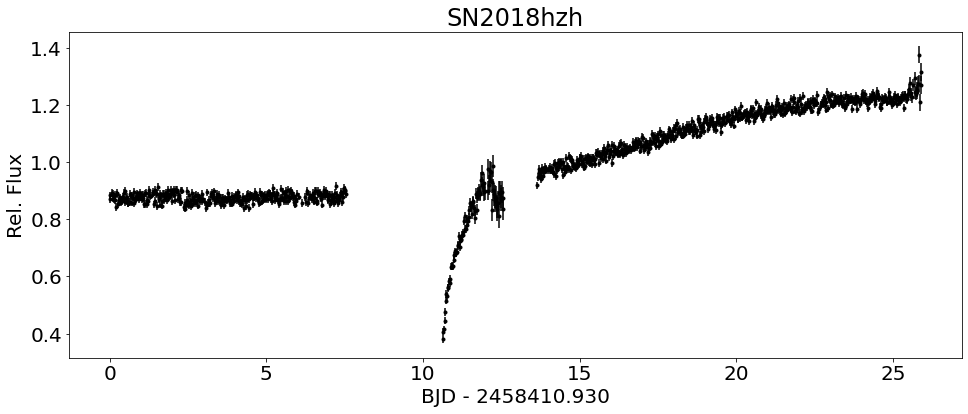

In [2]:
# set up the etsfit object for a single light curve
folderSAVE = "./"
#CBV_folder = "C:/Users/conta/.eleanor/metadata/"
#quaternion_folder_raw = "D:/quaternions-raw/"
#quaternion_folder_txt = "D:/quaternions-txt/"
CBV_folder = "data/"
quaternion_folder_raw = "data/"
quaternion_folder_txt = "data/"

bigInfoFile = "data/18thmag_Ia.csv"

etstest = etsMAIN(folderSAVE, bigInfoFile, CBV_folder,
                 quaternion_folder_raw, quaternion_folder_txt)

#load in test data and make a test plot
testSN = "data/rflxtarg_SN2018hzh_0431_30mn_n005_d4.0_of11.csv"
etstest.load_data_lygos_single(testSN)
etstest.test_plot()

#if you don't have quaternion text files produced, run 
#etstest.make_quatsTxt()

There are three general modifiers that you can apply to your light curve when you're running on it:
- 8 hour binning (True/False)
- Fraction of total flux cutoff (ie, only consider up to 60% of the peak) (0-1.0 or None)
- custom masking gross regions (None, or an array of the same size as your data with 0=remove 1=keep for each point)

These are all set up right before each run, and the methods aren't accessible outside of running. 


In [3]:
#custom mask on this target:
hzh2018mask = np.ones((len(etstest.time)))
hzh2018mask[340:433] = 0
hzh2018mask[910:] = 0

There are 6 main default fitTypes, 
- 1 = single 
- 2 = single with CBV
- 3 = double
- 4 = double with
- 5 = just cbvs
- 6 = single lygos bg
        
plus fitType of 0 for custom inputs and a separate function to run the GP fitting. 


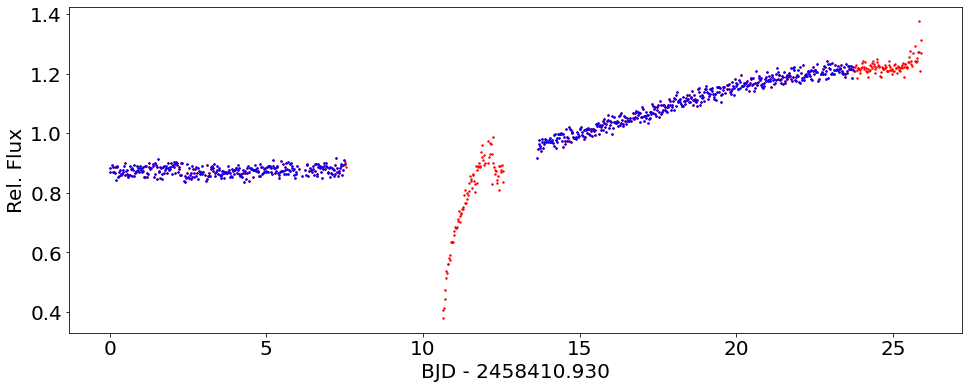

-singlepower-0.5
***
***
***
***
Beginning MCMC run


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:22<00:00, 70.10it/s]


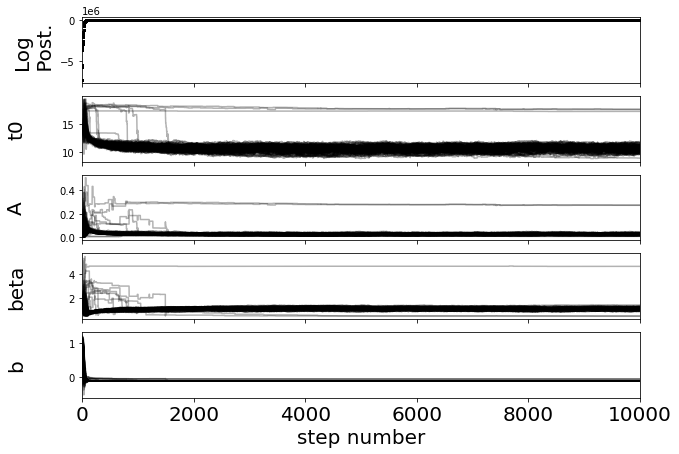

100%|████████████████████████████████████████████████████████████████████████████| 40000/40000 [11:46<00:00, 56.58it/s]


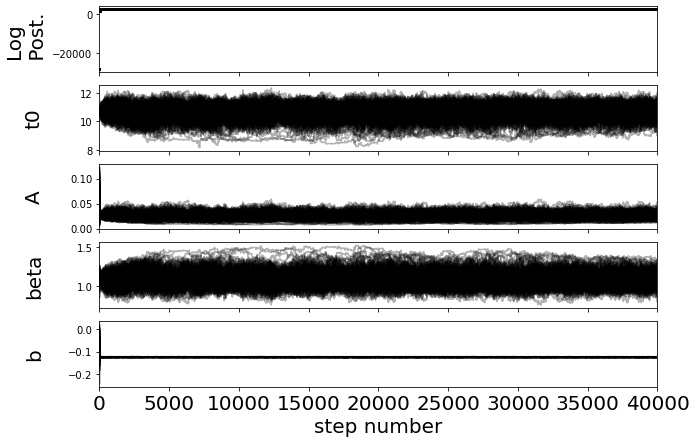

233300 samples post second run
t0 10.601085496543341 -0.6729774465476623 0.5602384856949829
A 0.02460638553676818 -0.007526904819717892 0.008525733550752083
beta 1.0985363519180091 -0.10956371690883693 0.12905752062660358
b -0.12483942873811915 -0.0007209569134500049 0.0007179619234312651
BAYESIAN INF CRIT:  [10.23728132]
starting model creation time axis at:  0.0


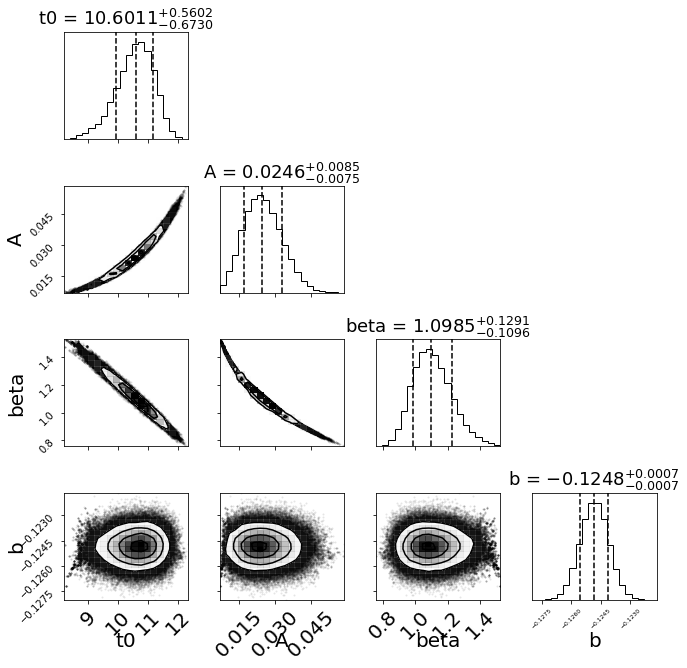

(array([[10.6010855 ,  0.02460639,  1.09853635, -0.12483943]]),
 10.23728131892491)

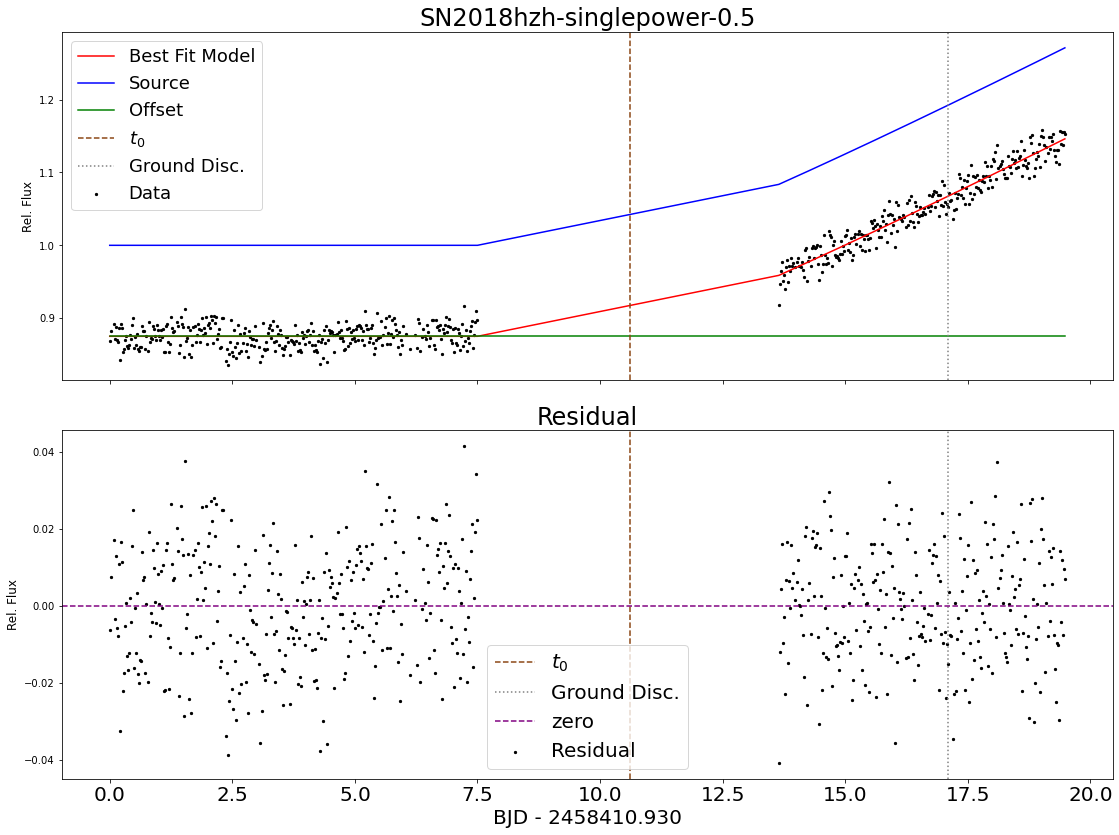

In [10]:
# run single fit of type 1
#args are: fitType, custom masking, binning, fractional fit, n1=number of steps initial chain n2=number steps second chain
#so this is masked, not binned, and cut to 50% of the peak 
etstest.run_MCMC(1, hzh2018mask, None, fraction=0.5, n1=10000, n2=30000)


Loading quaternions
quaternion load complete - loading cbvs
cbv load completed


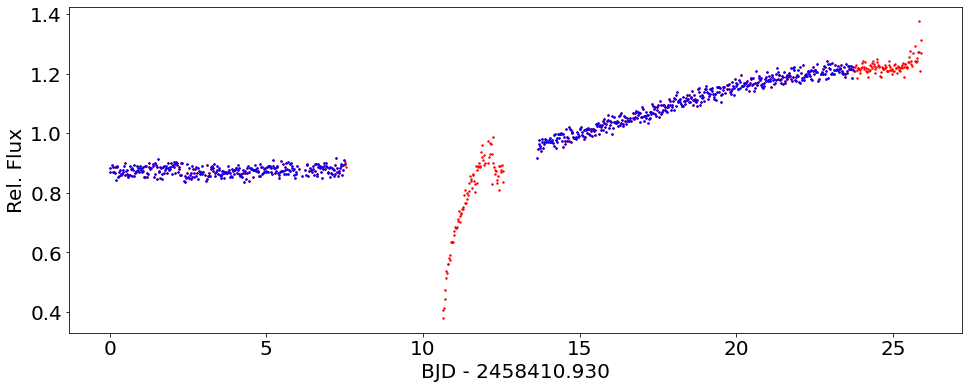

TRIMMING FRACTIONALLY CBVS
quall 617
-singlepower-CBV-0.5
***
***
***
***
Beginning MCMC run


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:00<00:00, 20.80it/s]


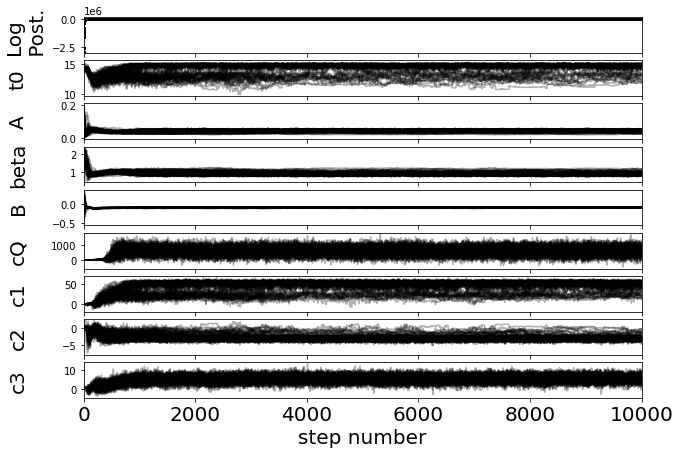

100%|████████████████████████████████████████████████████████████████████████████| 30000/30000 [30:04<00:00, 16.62it/s]


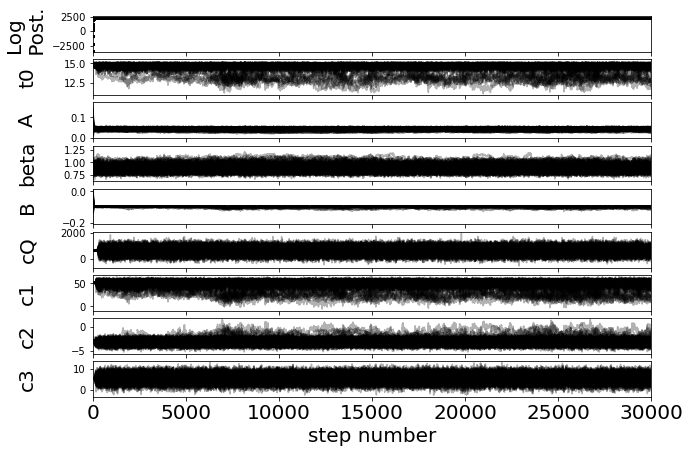

166600 samples post second run
t0 14.810738663338402 -0.3552177652062163 0.09740305918386305
A 0.045109762943116194 -0.00591081338427972 0.0037547259465250393
beta 0.867483103561558 -0.04870307140612229 0.0780982600058131
B -0.09873923615843197 -0.0016187764145987188 0.001360999895502396
cQ 619.6658844445794 -243.78532281208606 240.43101507101733
c1 52.07498589246279 -7.5516622918807315 3.3876636717373643
c2 -3.127755766013066 -0.4630999564737204 0.5267436420008393
c3 5.537902493596855 -1.723263998317106 1.6244900235361008
BAYESIAN INF CRIT:  [35.92618616]
starting model creation time axis at:  0.0


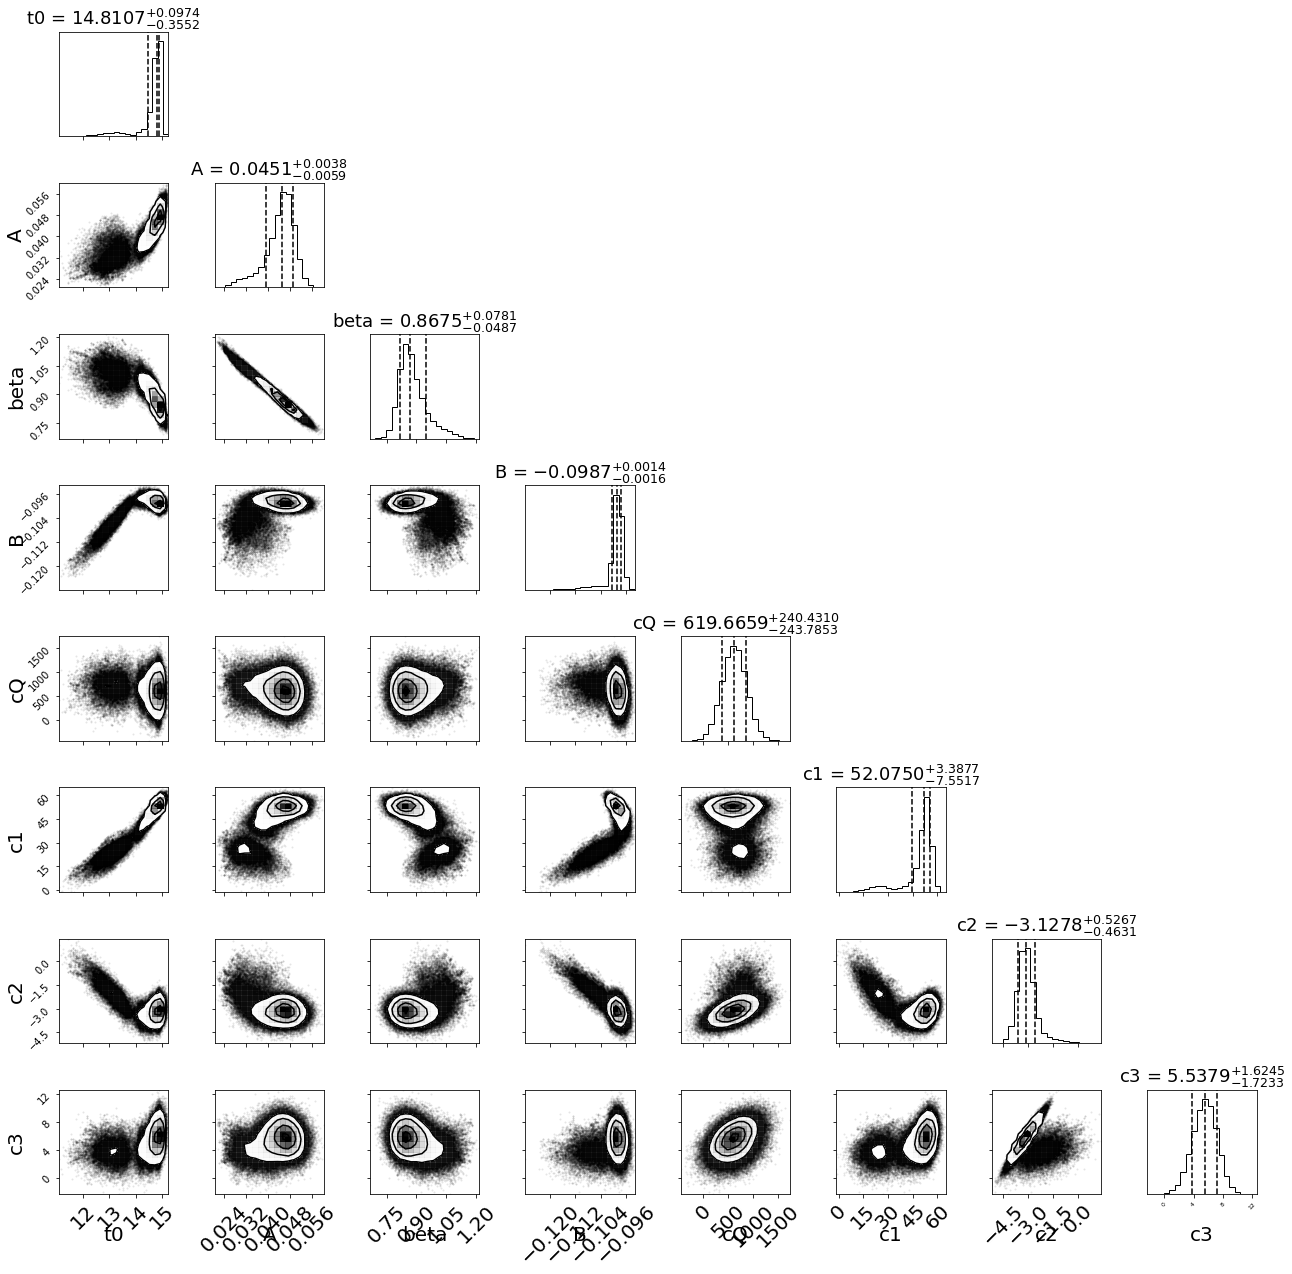

(array([[ 1.48107387e+01,  4.51097629e-02,  8.67483104e-01,
         -9.87392362e-02,  6.19665884e+02,  5.20749859e+01,
         -3.12775577e+00,  5.53790249e+00]]),
 35.92618616347867)

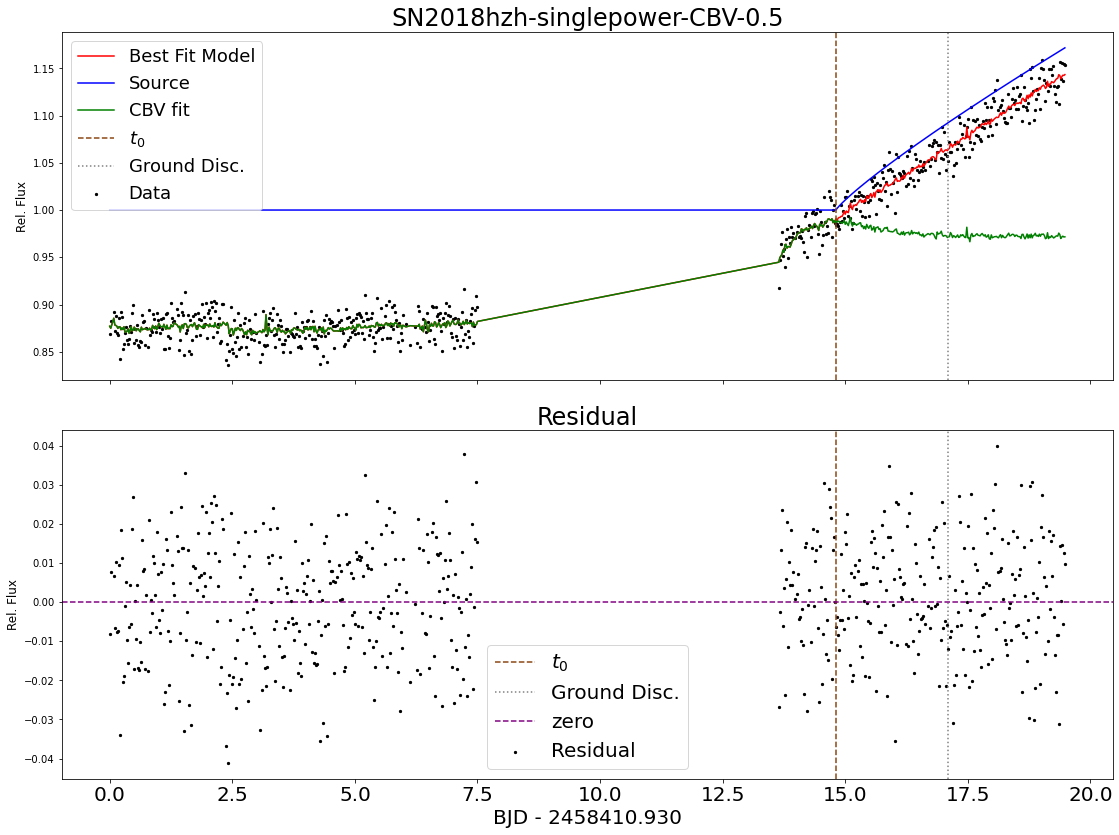

In [5]:
#run a single fit of type 2:
etstest.run_MCMC(2, hzh2018mask, None, fraction=0.5, n1=10000, n2=30000)

Types 3 and 4 repeat types 1 and 2 but with a double power law instead of a single power law. 

Type 5 fits only the CBVs and quaternions to the light curve. 

Type 6 requires you to be using a lygos light curve, with a corresponding rflx file. 

You can run all 6 of these default fits via etstest.run_all_fit_types()

The other fit type uses a Gaussian Process model to eat up background noise. It can be accessed via etstest.run_GP_fit()

In [ ]:
#code for a custom fit
# =============================================================================
# priors = [0, 20, 0.5, 1, 0.0, 5.0, -5, 5]
# args = (etstest.time, etstest.intensity, etstest.error, etstest.disctime, priors)
# logProbFunc = mc.log_probability_singlepower_noCBV
# filesavetag = "-singlepower-custom-arg-test"
# labels = ["t0", "A", "beta",  "b"]
# init_values = np.array((etstest.disctime-3, 0.1, 1.8, 1))
# 
# etstest.run_MCMC(fitType=0, binYesNo = False, fraction = None, n1=10000, n2=40000,
#                  saveBIC=False, args=args,logProbFunc = logProbFunc, plotFit = 1,
#                  filesavetag=filesavetag, labels=labels, init_values=init_values)
# 
# =============================================================================
